# <b><span style='color:#F1A424'>AutoML - Regression - Medical Insurance Charges Prediction</span> </b>

### Disclaimer
Please note, the Vantage Functions via SQLAlchemy feature is a preview/beta code release with limited functionality (the “Code”). As such, you acknowledge that the Code is experimental in nature and that the Code is provided “AS IS” and may not be functional on any machine or in any environment. TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## <b> Problem overview:</b>
    

**Dataset Used : Medical insurance Dataset**

**Features**:

- `Age`: The insured person's age.
- `Sex`: Gender (male or female) of the insured.
- `BMI (Body Mass Index)`: A measure of body fat based on height and weight.
- `Children`: The number of dependents covered.
- `Smoker`: Whether the insured is a smoker (yes or no).
- `Region`: The geographic area of coverage.

**Target Variable**:

- `Charges`: The medical insurance costs incurred by the insured person.
    
**Objective**:

The primary objective is typically to build a model that can accurately predict medical insurance costs incurred by the insured person.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoRegressor

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','insurance')

In [5]:
# Fetching in teradata dataframe
insurance_df = DataFrame("insurance")

In [6]:
# first 5 rows
insurance_df.head()

sex     bmi  children smoker     region       charges
age                                                          
18     male  53.130         0     no  southeast   1163.462700
18   female  31.130         0     no  southeast   1621.882700
18   female  40.260         0     no  southeast   1634.573400
18     male  17.290         2    yes  northeast  12829.455100
18     male  43.010         0     no  southeast   1149.395900
18   female  29.165         0     no  northeast   7323.734819
18     male  23.210         0     no  southeast   1121.873900
18   female  25.080         0     no  northeast   2196.473200
18   female  36.850         0    yes  southeast  36149.483500
18   female  20.790         0     no  southeast   1607.510100

In [7]:
# insurance_df dataset
insurance_df.shape

(1338, 7)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
insurance_df_sample = insurance_df.sample(frac = [0.8, 0.2])

In [9]:
insurance_df_sample.head()

sex     bmi  children smoker     region       charges  sampleid
age                                                                    
18     male  17.290         2    yes  northeast  12829.455100         1
18     male  41.140         0     no  southeast   1146.796600         1
18   female  42.240         0    yes  southeast  38792.685600         1
18   female  29.165         0     no  northeast   7323.734819         2
18   female  36.850         0    yes  southeast  36149.483500         1
18     male  34.100         0     no  southeast   1137.011000         2
18   female  33.880         0     no  southeast  11482.634850         1
18   female  26.315         0     no  northeast   2198.189850         2
18   female  31.350         0     no  southeast   1622.188500         2
18   female  31.130         0     no  southeast   1621.882700         1

In [10]:
# Fetching train and test data
insurance_df_train= insurance_df_sample[insurance_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
insurance_df_test = insurance_df_sample[insurance_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
insurance_df_train.shape

(1070, 7)

In [12]:
# test data shape
insurance_df_test.shape

(268, 7)

In [13]:
#train dataset
insurance_df_train.head()

sex     bmi  children smoker     region     charges
age                                                        
18   female  32.120         2     no  southeast  2801.25880
18   female  36.850         0     no  southeast  1629.83350
18   female  39.160         0     no  southeast  1633.04440
18     male  21.470         0     no  northeast  1702.45530
18   female  40.185         0     no  northeast  2217.46915
18   female  40.280         0     no  northeast  2217.60120
18     male  35.200         1     no  southeast  1727.54000
18     male  30.140         0     no  southeast  1131.50660
18   female  31.920         0     no  northeast  2205.98080
18   female  31.350         4     no  northeast  4561.18850

In [14]:
# test dataset
insurance_df_test.head()

sex     bmi  children smoker     region       charges
age                                                          
18   female  29.165         0     no  northeast   7323.734819
18   female  38.280         0     no  southeast   1631.821200
18   female  31.350         0     no  southeast   1622.188500
18   female  26.315         0     no  northeast   2198.189850
18     male  26.125         0     no  northeast   1708.925750
18     male  33.535         0    yes  northeast  34617.840650
18     male  26.180         2     no  southeast   2304.002200
18   female  26.730         0     no  southeast   1615.766700
18     male  34.100         0     no  southeast   1137.011000
18     male  33.660         0     no  southeast   1136.399400

## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [15]:
# Creating AutoRegressor instance
# Using all models from model training.
# Keeping early stopping timer threshold to 200 sec
# and verbose level 2 for detailed loggging
# Using volatile=True to create all intermediate tables as volatile tables.

aml = AutoRegressor(max_runtime_secs=200,
                    verbose=2,
                    volatile=True)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 1070
Total Columns in the data: 7

Column Summary:


ColumnName                         Datatype  NonNullCount  NullCount  BlankCount  ZeroCount  PositiveCount  NegativeCount  NullPercentage  NonNullPercentage
0        sex  VARCHAR(20) CHARACTER SET LATIN          1070          0         0.0        NaN            NaN            NaN             0.0              100.0
1     region  VARCHAR(20) CHARACTER SET LATIN          1070          0         0.0        NaN            NaN            NaN             0.0              100.0
2     smoker  VARCHAR(20) CHARACTER SET LATIN          1070          0         0.0        NaN            NaN            NaN             0.0              100.0
3   children                          INTEGER          1070          0         NaN      453.0          617.0            0.0             0.0              100.0
4        bmi                            FLOAT          1070          0         NaN        0.0         1070.0            0.0             0.0              100.0
5        age                          INTEGER          1070          0         NaN        0.0         1070.0            0.0             0.0              100.0
6    charges                            FLOAT          1070          0         NaN        0.0         1070.0            0.0             0.0              100.0

            age       bmi  children    charges
func                                          
min      18.000    15.960     0.000   1121.874
std      13.950     6.195     1.198  11967.243
25%      27.000    26.296     0.000   4803.719
50%      40.000    30.495     1.000   9502.442
75%      51.000    34.893     2.000  16547.262
max      64.000    53.130     5.000  63770.428
mean     39.315    30.768     1.099  13219.012
count  1070.000  1070.000  1070.000   1070.000

Statistics of Data:


age       bmi  children    charges
func                                          
50%      40.000    30.495     1.000   9502.442
count  1070.000  1070.000  1070.000   1070.000
mean     39.315    30.768     1.099  13219.012
min      18.000    15.960     0.000   1121.874
max      64.000    53.130     5.000  63770.428
75%      51.000    34.893     2.000  16547.262
25%      27.000    26.296     0.000   4803.719
std      13.950     6.195     1.198  11967.243


Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
sex                       2         
smoker                    2         
region                    4         

No Futile columns found.

Target Column Distribution:


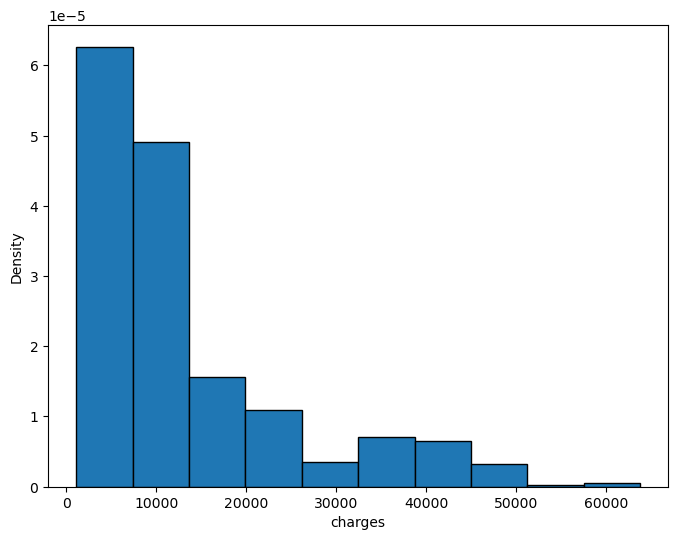

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0    charges          10.186916
1        bmi           0.373832


sex     bmi  children smoker     region      charges
age                                                         
34     male  34.210         0     no  southeast   3935.17990
38     male  29.260         2     no  northwest   6457.84340
38     male  28.025         1     no  northeast   6067.12675
32   female  17.765         2    yes  northwest  32734.18630
19   female  21.700         0    yes  southwest  13844.50600
19     male  20.615         2     no  northwest   2803.69785
49   female  31.900         5     no  southwest  11552.90400
49   female  27.170         0     no  southeast   8601.32930
61     male  32.300         2     no  northwest  14119.62000
61   female  21.090         0     no  northwest  13415.03810

Remaining Rows in the data: 1069                                                        
Remaining Columns in the data: 7


Analysis indicates all categorical columns are significant. No action Needed.           


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


['sex', 'smoker', 'region']


sex_0  sex_1     bmi  children  smoker_0  smoker_1  region_0  region_1  region_2  region_3      charges   id
age                                                                                                              
49       1      0  22.610         1         1         0         0         1         0         0   9566.99090  125
49       1      0  27.100         1         1         0         0         0         0         1  26140.36030   77
49       1      0  23.180         2         1         0         0         1         0         0  10156.78320  149
49       0      1  22.515         0         1         0         1         0         0         0   8688.85885  181
49       0      1  32.300         3         1         0         0         1         0         0  10269.46000  197
49       0      1  37.510         2         1         0         0         0         1         0   9304.70190  205
49       0      1  25.840         2         0         1         0         1         0         0  23807.24060   61
49       1      0  27.170         0         1         0         0         0         1         0   8601.32930   21
49       1      0  41.470         4         1         0         0         0         1         0  10977.20630   85
49       1      0  23.845         3         0         1         1         0         0         0  24106.91255  101

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0    charges          10.196445
1        bmi           0.374181


['bmi']


sex_0  sex_1     bmi  children  smoker_0  smoker_1  region_0  region_1  region_2  region_3      charges   id
age                                                                                                              
19       1      0  25.745         1         1         0         0         1         0         0   2710.82855  179
19       1      0  36.575         0         1         0         0         1         0         0   2136.88225  147
19       0      1  30.590         0         1         0         0         1         0         0   1639.56310  203
19       0      1  27.265         2         1         0         0         1         0         0  22493.65964  115
19       0      1  20.900         1         1         0         0         0         0         1   1832.09400   67
19       1      0  24.700         0         1         0         0         0         0         1   1737.37600  227
19       1      0  23.400         2         1         0         0         0         0         1   2913.56900  395
19       0      1  22.610         0         1         0         0         1         0         0   1628.47090  235
19       1      0  24.605         1         1         0         0         1         0         0   2709.24395  291
19       0      1  27.600         0         1         0         0         0         0         1   1252.40700  219

['smoker_1', 'region_2', 'children', 'smoker_0', 'age', 'bmi']


['children', 'age', 'bmi']


smoker_1  region_2     charges  smoker_0  id  children       age       bmi
0         0         0   6496.8860         1  10 -0.083816  0.044568 -0.541454
1         0         0   6457.8434         1  12  0.750429 -0.099048 -0.235487
2         0         0  11552.9040         1  13  3.253164  0.690842  0.198790
3         0         0  14119.6200         1  14  0.750429  1.552540  0.264590
4         0         0   2904.0880         1  16 -0.083816 -0.960747 -0.113757
5         1         1  18972.4950         0  17  0.750429 -0.386281 -0.886902
6         1         0  32734.1863         0  15  0.750429 -0.529897 -2.126400
7         1         0  13844.5060         0  11 -0.918061 -1.463404 -1.479097
8         0         1   3935.1799         1   9 -0.918061 -0.386281  0.578782
9         0         0   2897.3235         1   8 -0.918061 -0.960747 -0.204232

['smoker_1', 'region_2', 'sex_1', 'children', 'region_3', 'region_1', 'sex_0', 'smoker_0', 'region_0', 'age', 'bmi']


['r_children', 'r_age', 'r_bmi']


r_region_2  r_smoker_1  r_sex_1  r_smoker_0  r_region_0     charges  r_sex_0  r_region_1  id  r_region_3  r_children     r_age     r_bmi
0           0           0        0           1           0   6496.8860        1           0  10           1   -0.083816  0.044568 -0.541454
1           0           0        1           1           0   6457.8434        0           1  12           0    0.750429 -0.099048 -0.235487
2           0           0        0           1           0  11552.9040        1           0  13           1    3.253164  0.690842  0.198790
3           0           0        1           1           0  14119.6200        0           1  14           0    0.750429  1.552540  0.264590
4           0           0        1           1           0   2904.0880        0           0  16           1   -0.083816 -0.960747 -0.113757
5           1           1        1           0           0  18972.4950        0           0  17           0    0.750429 -0.386281 -0.886902
6           0           1        0           0           0  32734.1863        1           1  15           0    0.750429 -0.529897 -2.126400
7           0           1        0           0           0  13844.5060        1           0  11           1   -0.918061 -1.463404 -1.479097
8           1           0        1           1           0   3935.1799        0           0   9           0   -0.918061 -0.386281  0.578782
9           0           0        1           1           1   2897.3235        0           0   8           0   -0.918061 -0.960747 -0.204232

['age', 'bmi', 'children']


smoker_1  region_2  sex_1  region_0  sex_0  smoker_0  region_1      charges  region_3   id       age       bmi  children
0         0         0      1         0      0         1         0   1252.40700         1  219 -1.463404 -0.508554 -0.918061
1         0         0      0         0      1         1         0   3410.32400         1  152 -0.960747  1.926027 -0.083816
2         1         0      0         1      1         0         0  14455.64405         0  160 -0.960747 -2.220164  0.750429
3         0         0      1         0      0         1         0   7196.86700         1   42  0.044568  0.758086  1.584674
4         0         1      1         0      0         1         0   4686.38870         0   39 -0.529897  2.605407  0.750429
5         0         0      1         0      0         1         1   4454.40265         0  103 -0.529897 -0.469897 -0.083816
6         0         1      0         0      1         1         0   5400.98050         0   68 -0.099048  1.555905 -0.918061
7         0         0      0         1      1         1         0   7144.86265         0   52 -0.099048 -0.469897  0.750429
8         0         0      0         1      1         1         0  13616.35860         0   38  1.552540 -1.423167 -0.918061
9         0         0      0         1      1         1         0  13635.63790         0  126  1.552540  0.858430 -0.918061

['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7']


response_column : charges                                                                                                                             
name : decision_forest
tree_type : Regression
min_impurity : (0.0, 0.1, 0.2)
max_depth : (5, 6, 8, 10)
min_node_size : (1, 2, 3)
num_trees : (-1, 20, 30)
seed : 42
Total number of models for decision_forest : 108
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : charges
name : xgboost
model_type : Regression
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1, 0.2)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.1, 0.3)
max_depth : (5, 6, 8, 10)
min_node_size : (1, 2, 3)
iter_num : (10, 20, 30)
seed : 42
Total number of models for xgboost : 2592
-----------------------------------------------------------------------------------------------------------------------

RANK          MODEL_ID FEATURE_SELECTION           MAE           MSE  \
0      1  DECISIONFOREST_3             lasso   3204.701352  2.394295e+07   
1      2         XGBOOST_3             lasso   2673.385865  2.444487e+07   
2      3         XGBOOST_0             lasso   2673.385865  2.444487e+07   
3      4         XGBOOST_1               rfe   2668.422255  2.532534e+07   
4      5             KNN_9             lasso   2974.159143  2.607148e+07   
5      6             KNN_0             lasso   3087.714859  2.962272e+07   
6      7  DECISIONFOREST_1               rfe   3083.396493  3.107220e+07   
7      8  DECISIONFOREST_0             lasso   3161.345176  3.283612e+07   
8      9         XGBOOST_2               pca   3501.320112  3.491305e+07   
9     10             KNN_8               pca   3473.042257  3.718392e+07   
10    11             KNN_4               rfe   3473.042255  3.718392e+07   
11    12  DECISIONFOREST_2               pca   3932.754180  4.135568e+07   
12    13             GLM_0             lasso   5491.403799  5.027839e+07   
13    14             GLM_3             lasso   5391.485954  5.375502e+07   
14    15             GLM_2               pca   5975.021445  6.171242e+07   
15    16             GLM_1               rfe   6293.417007  6.774884e+07   
16    17             SVM_1               rfe  13759.810367  3.137583e+08   
17    18             SVM_0             lasso  13760.156864  3.137681e+08   
18    19             SVM_3             lasso  13760.177387  3.137685e+08   
19    20             SVM_2               pca  13760.617619  3.137783e+08   

         MSLE       MAPE        MPE          RMSE     RMSLE            ME  \
0    0.199091  34.994715 -21.577959   4893.153590  0.446197  17474.243217   
1    0.181988  23.594700  -6.541959   4944.174856  0.426601  17671.244446   
2    0.181988  23.594700  -6.541959   4944.174856  0.426601  17671.244446   
3    0.199505  22.181357  -4.631161   5032.428554  0.446659  19249.934581   
4    0.199978  27.358116  -9.626668   5106.024328  0.447189  19529.044003   
5    0.229071  28.431382  -8.798467   5442.675972  0.478614  19826.448998   
6    0.212347  26.262703  -7.555852   5574.244104  0.460811  21811.492299   
7    0.227639  27.882445  -9.461145   5730.280634  0.477116  21811.492299   
8    0.277218  36.237425 -17.814087   5908.726241  0.526515  19858.598415   
9    0.247896  27.244913  -4.455118   6097.861885  0.497892  28910.202216   
10   0.247896  27.244913  -4.455118   6097.861887  0.497892  28910.202166   
11   0.261441  33.853224  -9.254954   6430.838267  0.511313  21794.025696   
12   0.316363  60.005330   9.054123   7090.725456  0.562462  27026.231939   
13   0.356870  62.556263  34.425764   7331.781583  0.597386  27660.700986   
14   0.377432  69.090320  28.026588   7855.725420  0.614355  23491.874051   
15   0.511578  70.646199  21.789217   8230.968300  0.715247  24365.809409   
16  58.235069  99.981911  99.981911  17713.223786  7.631191  48968.846213   
17  42.802095  99.986781  99.986781  17713.501029  6.542331  48969.202439   
18  41.088635  99.987293  99.987293  17713.511939  6.410042  48968.995843   
19   9.001166  99.994032  99.994032  17713.789508  3.000194  48969.409423   

          R2        EV            MPD           MGD  ADJUSTED_R2  
0   0.807572  0.807588    1969.472143      0.222008     0.806481  
1   0.803538  0.807378    2087.162683      0.257690     0.802424  
2   0.803538  0.807378    2087.162683      0.257690     0.802424  
3   0.796462  0.801755    2307.962874      0.336576     0.794336  
4   0.790465  0.793756    2222.172457      0.280939     0.789277  
5   0.761924  0.765923    2537.747478      0.330693     0.760574  
6   0.750275  0.753803    2535.565179      0.334727     0.747666  
7   0.736098  0.738584    2672.358087      0.356194     0.734602  
8   0.719406  0.719518    2957.143306      0.372699     0.717280  
9   0.701155  0.715915    3050.637886      0.395608     0.698891  
10  0.701155  0.715915    3050.637893      0.395608 

In [16]:
# Fitting train data
aml.fit(insurance_df_train, insurance_df_train.charges)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [17]:
# Fetching Leaderboard
aml.leaderboard()

RANK          MODEL_ID FEATURE_SELECTION           MAE           MSE  \
0      1  DECISIONFOREST_3             lasso   3204.701352  2.394295e+07   
1      2         XGBOOST_3             lasso   2673.385865  2.444487e+07   
2      3         XGBOOST_0             lasso   2673.385865  2.444487e+07   
3      4         XGBOOST_1               rfe   2668.422255  2.532534e+07   
4      5             KNN_9             lasso   2974.159143  2.607148e+07   
5      6             KNN_0             lasso   3087.714859  2.962272e+07   
6      7  DECISIONFOREST_1               rfe   3083.396493  3.107220e+07   
7      8  DECISIONFOREST_0             lasso   3161.345176  3.283612e+07   
8      9         XGBOOST_2               pca   3501.320112  3.491305e+07   
9     10             KNN_8               pca   3473.042257  3.718392e+07   
10    11             KNN_4               rfe   3473.042255  3.718392e+07   
11    12  DECISIONFOREST_2               pca   3932.754180  4.135568e+07   
12    13             GLM_0             lasso   5491.403799  5.027839e+07   
13    14             GLM_3             lasso   5391.485954  5.375502e+07   
14    15             GLM_2               pca   5975.021445  6.171242e+07   
15    16             GLM_1               rfe   6293.417007  6.774884e+07   
16    17             SVM_1               rfe  13759.810367  3.137583e+08   
17    18             SVM_0             lasso  13760.156864  3.137681e+08   
18    19             SVM_3             lasso  13760.177387  3.137685e+08   
19    20             SVM_2               pca  13760.617619  3.137783e+08   

         MSLE       MAPE        MPE          RMSE     RMSLE            ME  \
0    0.199091  34.994715 -21.577959   4893.153590  0.446197  17474.243217   
1    0.181988  23.594700  -6.541959   4944.174856  0.426601  17671.244446   
2    0.181988  23.594700  -6.541959   4944.174856  0.426601  17671.244446   
3    0.199505  22.181357  -4.631161   5032.428554  0.446659  19249.934581   
4    0.199978  27.358116  -9.626668   5106.024328  0.447189  19529.044003   
5    0.229071  28.431382  -8.798467   5442.675972  0.478614  19826.448998   
6    0.212347  26.262703  -7.555852   5574.244104  0.460811  21811.492299   
7    0.227639  27.882445  -9.461145   5730.280634  0.477116  21811.492299   
8    0.277218  36.237425 -17.814087   5908.726241  0.526515  19858.598415   
9    0.247896  27.244913  -4.455118   6097.861885  0.497892  28910.202216   
10   0.247896  27.244913  -4.455118   6097.861887  0.497892  28910.202166   
11   0.261441  33.853224  -9.254954   6430.838267  0.511313  21794.025696   
12   0.316363  60.005330   9.054123   7090.725456  0.562462  27026.231939   
13   0.356870  62.556263  34.425764   7331.781583  0.597386  27660.700986   
14   0.377432  69.090320  28.026588   7855.725420  0.614355  23491.874051   
15   0.511578  70.646199  21.789217   8230.968300  0.715247  24365.809409   
16  58.235069  99.981911  99.981911  17713.223786  7.631191  48968.846213   
17  42.802095  99.986781  99.986781  17713.501029  6.542331  48969.202439   
18  41.088635  99.987293  99.987293  17713.511939  6.410042  48968.995843   
19   9.001166  99.994032  99.994032  17713.789508  3.000194  48969.409423   

          R2        EV            MPD           MGD  ADJUSTED_R2  
0   0.807572  0.807588    1969.472143      0.222008     0.806481  
1   0.803538  0.807378    2087.162683      0.257690     0.802424  
2   0.803538  0.807378    2087.162683      0.257690     0.802424  
3   0.796462  0.801755    2307.962874      0.336576     0.794336  
4   0.790465  0.793756    2222.172457      0.280939     0.789277  
5   0.761924  0.765923    2537.747478      0.330693     0.760574  
6   0.750275  0.753803    2535.565179      0.334727     0.747666  
7   0.736098  0.738584    2672.358087      0.356194     0.734602  
8   0.719406  0.719518    2957.143306      0.372699     0.717280  
9   0.701155  0.715915    3050.637886      0.395608     0.698891  
10  0.701155  0.715915    3050.637893      0.395608 

## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [18]:
# Fetching best performing model for dataset
aml.leader()

RANK          MODEL_ID FEATURE_SELECTION          MAE           MSE  \
0     1  DECISIONFOREST_3             lasso  3204.701352  2.394295e+07   

       MSLE       MAPE        MPE        RMSE     RMSLE            ME  \
0  0.199091  34.994715 -21.577959  4893.15359  0.446197  17474.243217   

         R2        EV          MPD       MGD  ADJUSTED_R2  
0  0.807572  0.807588  1969.472143  0.222008     0.806481

## <b><span style='color:#F1A424'>| 5.</span> Get Hyperparameter for Trained Model : </b>

In [19]:
aml.model_hyperparameters(rank=2)

{'response_column': 'charges',
 'name': 'xgboost',
 'model_type': 'Regression',
 'column_sampling': 1,
 'min_impurity': 0.0,
 'lambda1': 0.01,
 'shrinkage_factor': 0.5,
 'max_depth': 5,
 'min_node_size': 1,
 'iter_num': 20,
 'seed': 42,
 'persist': False}

In [20]:
aml.model_hyperparameters(rank=4)

{'response_column': 'charges',
 'name': 'xgboost',
 'model_type': 'Regression',
 'column_sampling': 1,
 'min_impurity': 0.0,
 'lambda1': 0.01,
 'shrinkage_factor': 0.5,
 'max_depth': 5,
 'min_node_size': 1,
 'iter_num': 10,
 'seed': 42,
 'persist': False}

## <b><span style='color:#F1A424'>| 6.</span> Generate Prediction and Performance Metrics : </b>

In [21]:
# Generating prediction on test data
prediction = aml.predict(insurance_df_test)

Data Transformation started ...


sex_0  sex_1    bmi  children  smoker_0  smoker_1  region_0  region_1  region_2  region_3     charges  id
age                                                                                                           
32       1      0  24.60         0         0         1         0         0         0         1  17496.3060  47
32       0      1  33.63         1         0         1         1         0         0         0  37607.5277  23
32       1      0  29.80         2         1         0         0         0         0         1   5152.1340  15
32       0      1  31.50         1         1         0         0         0         0         1   4076.4970  31
51       1      0  25.80         1         1         0         0         0         0         1   9861.0250  87
51       0      1  37.00         0         1         0         0         0         0         1   8798.5930  79
51       1      0  39.50         1         1         0         0         0         0         1   9880.0680  95
32       0      1  28.12         4         0         1         0         1         0         0  21472.4788  63
32       1      0  28.93         0         1         0         0         0         1         0   3972.9247  39
32       0      1  30.80         3         1         0         0         0         0         1   5253.5240  55

id  region_2  children  smoker_0  age     bmi     charges
smoker_1                                                            
1         306         1         2         0   52  41.800  47269.8540
1          65         1         2         0   64  36.960  49577.6624
1          45         1         1         0   41  35.750  40273.6455
1         109         0         1         0   50  27.600  24520.2640
1         181         0         2         0   48  40.565  45702.0223
1         149         1         3         0   48  25.850  24180.9335
0          17         0         1         1   34  27.500   5003.8530
0          33         0         1         1   64  24.700  30166.6182
0         113         0         0         1   33  26.695   4571.4131
0         105         0         1         1   33  22.135   5354.0746

smoker_1  region_2     charges  smoker_0   id  children       age       bmi
0         0         0   4571.4131         1  113 -0.918061 -0.458089 -0.657426
1         0         1   3704.3545         1  121 -0.918061 -0.458089 -0.072633
2         0         0   4766.0220         1   89 -0.083816 -0.458089 -2.005493
3         0         1  11326.7149         1   81 -0.083816 -0.458089  1.935897
4         0         0   6389.3778         1   26 -0.083816  0.044568 -0.719935
5         0         0   6986.6970         1   18  0.750429  0.044568  0.264590
6         1         1  35595.5898         0  130  1.584674 -1.247979  0.054031
7         1         0  39983.4259         0  282  1.584674 -0.314473  0.561510
8         1         1  47269.8540         0  306  0.750429  0.906267  1.827328
9         1         0  29330.9832         0   57 -0.918061  1.767965 -0.626171

id  region_2  sex_1  children  region_3  region_1  sex_0  smoker_0  region_0  age     bmi     charges
smoker_1                                                                                                        
1         306         1      1         2         0         0      0         0         0   52  41.800  47269.8540
1          65         1      1         2         0         0      0         0         0   64  36.960  49577.6624
1          45         1      1         1         0         0      0         0         0   41  35.750  40273.6455
1         109         0      0         1         1         0      1         0         0   50  27.600  24520.2640
1         181         0      1         2         0         1      0         0         0   48  40.565  45702.0223
1         149         1      0         3         0         0      1         0         0   48  25.850  24180.9335
0          17         0      0         1         1         0      1         1         0   34  27.500   5003.8530
0          33         0      1         1         0         1      0         1         0   64  24.700  30166.6182
0         113         0      0         0         0         1      1         1         0   33  26.695   4571.4131
0         105         0      0         1         0         0      1         1         1   33  22.135   5354.0746

r_region_2  r_smoker_1  r_region_3  r_smoker_0  r_region_0     charges  r_sex_0  r_region_1   id  r_sex_1  r_children     r_age     r_bmi
0           1           1           0           0           0  47269.8540        0           0  306        1    0.750429  0.906267  1.827328
1           1           1           0           0           0  49577.6624        0           0   65        1    0.750429  1.767965  1.031154
2           1           1           0           0           0  40273.6455        0           0   45        1   -0.083816  0.116376  0.832110
3           0           1           1           0           0  24520.2640        1           0  109        0   -0.083816  0.762650 -0.508554
4           0           1           0           0           0  45702.0223        0           1  181        1    0.750429  0.619034  1.624172
5           1           1           0           0           0  24180.9335        1           0  149        0    1.584674  0.619034 -0.796427
6           0           0           1           1           0   5003.8530        1           0   17        0   -0.083816 -0.386281 -0.525004
7           0           0           0           1           0  30166.6182        0           1   33        1   -0.083816  1.767965 -0.985601
8           0           0           0           1           0   4571.4131        1           1  113        0   -0.918061 -0.458089 -0.657426
9           0           0           0           1           1   5354.0746        1           0  105        0   -0.083816 -0.458089 -1.407540

smoker_1  region_2  sex_1  region_3  sex_0     charges  region_1  region_0  smoker_0   id       age       bmi  children
0         1         1      1         0      0  47269.8540         0         0         0  306  0.906267  1.827328  0.750429
1         1         1      1         0      0  49577.6624         0         0         0   65  1.767965  1.031154  0.750429
2         1         1      1         0      0  40273.6455         0         0         0   45  0.116376  0.832110 -0.083816
3         1         0      0         1      1  24520.2640         0         0         0  109  0.762650 -0.508554 -0.083816
4         1         0      1         0      0  45702.0223         1         0         0  181  0.619034  1.624172  0.750429
5         1         1      0         0      1  24180.9335         0         0         0  149  0.619034 -0.796427  1.584674
6         0         0      0         1      1   5003.8530         0         0         1   17 -0.386281 -0.525004 -0.083816
7         0         0      1         0      0  30166.6182         1         0         1   33  1.767965 -0.985601 -0.083816
8         0         0      0         0      1   4571.4131         1         0         1  113 -0.458089 -0.657426 -0.918061
9         0         0      0         0      1   5354.0746         0         1         1  105 -0.458089 -1.407540 -0.083816

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


id     col_0     col_1     col_2     col_3     col_4     col_5     col_6  \
0  130 -0.252990  1.417209  1.414906  0.675167  1.329404  0.053937 -0.349576   
1   17 -0.656678  0.110070 -0.087713  0.709039 -0.301600 -0.272412  0.605727   
2  282  0.571768  1.296994  0.828371  0.691452  1.048384  0.828952  0.479972   
3   33  0.430890  0.259988 -1.988143 -0.719704 -0.367754  0.738025 -0.095750   
4  306  2.153002 -0.035468  0.736875 -0.747028  1.172403  0.078915 -0.214235   
5  113 -1.098217 -0.590538 -0.343590  0.678287 -0.282397  0.751133  0.054009   
6   57  0.327719 -0.685398 -1.979997  0.441546  1.160000  0.792430  0.354321   
7  105 -1.354202  0.449973 -0.609105  0.699356 -0.176754 -0.615939 -0.289247   
8   65  2.164796  0.212920 -0.393131 -0.795149  1.231702  0.058982 -0.323986   
9  121 -0.515638 -0.846264  0.256019 -0.709105 -0.185676 -0.003566 -0.716428   

      col_7     charges  
0 -0.343106  35595.5898  
1 -0.570700   5003.8530  
2  0.506736  39983.4259  
3  0.120149  30166.6182  
4 -0.105841  47269.8540  
5  0.212897   4571.4131  
6  0.300797  29330.9832  
7  0.416939   5354.0746  
8 -0.245106  49577.6624  
9 -0.480143   3704.3545

Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           

Following model is being picked for evaluation:
Model ID : DECISIONFOREST_3 
Feature Selection Method : lasso

Prediction : 
    id    prediction  confidence_lower  confidence_upper     charges
0  306  42456.455117      39594.812820      45318.097413  47269.8540
1   65  43821.715127      41747.441250      45895.989004  49577.6624
2   45  41275.445319      36581.760211      45969.130427  40273.6455
3  109  24875.286633      19805.671251      29944.902016  24520.2640
4  181  42222.802902      38018.921064      46426.684741  45702.0223
5  149  24303.288351      20536.908519      28069.668182  24180.9335
6   17   6103.782673       4619.807335       7587.758011   5003.8530
7   33  18672.879362      14075.065843      23270.692882  30166.6182
8  113   4641.218062       4250.189483       5032.246641   4571.4131
9  105   5952.451557       3690.094012       8214.809102   5354.0746


In [22]:
# Printing prediction
prediction.head()

id    prediction  confidence_lower  confidence_upper     charges
0  10  42032.786084      37189.834433      46875.737735  39125.3322
1  12   6434.452969       5284.298054       7584.607884   5397.6167
2  13   9153.829273       8557.430475       9750.228072   9290.1395
3  14  17023.539637      12626.011227      21421.068046  13041.9210
4  16   5729.262190       3672.943773       7785.580607   3877.3043
5  17   6103.782673       4619.807335       7587.758011   5003.8530
6  15   5762.192618       3959.760963       7564.624272   5152.1340
7  11   5097.544972       2547.738434       7647.351509   1263.2490
8   9   8495.457275       6139.749057      10851.165493   5124.1887
9   8  37649.408110      33941.768350      41357.047870  36085.2190

In [23]:
# Fetching evaluation on test data
performance_metrics = aml.evaluate(insurance_df_test)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : DECISIONFOREST_3 
Feature Selection Method : lasso

Performance Metrics : 
          MAE           MSE      MSLE      MAPE        MPE         RMSE    RMSLE            ME        R2        EV          MPD      MGD
0  3100.62896  2.398601e+07  0.241483  43.13417 -32.224945  4897.551806  0.49141  21469.649859  0.850378  0.850813  1992.934241  0.25098


In [24]:
performance_metrics

MAE           MSE      MSLE      MAPE        MPE         RMSE    RMSLE            ME        R2        EV          MPD      MGD
0  3100.62896  2.398601e+07  0.241483  43.13417 -32.224945  4897.551806  0.49141  21469.649859  0.850378  0.850813  1992.934241  0.25098

## <b><span style='color:#F1A424'>| 7.</span> Deploy and Load Models : </b>

### <b><span style='color:#F1A424'>| 7.1. </span> Deploy models : </b>

In [25]:
aml.deploy(table_name='ins_range_models', ranks=range(4,7))

Model Deployment Completed Successfully.


### <b><span style='color:#F1A424'>| 7.2. </span> Load models : </b>

In [26]:
# Loading models

models_1 = aml.load('ins_range_models')

In [27]:
models_1

RANK          MODEL_ID FEATURE_SELECTION          MAE           MSE  \
0     1         XGBOOST_1               rfe  2668.422255  2.532534e+07   
1     2             KNN_9             lasso  2974.159143  2.607148e+07   
2     3             KNN_0             lasso  3087.714859  2.962272e+07   
3     4  DECISIONFOREST_1               rfe  3083.396493  3.107220e+07   

       MSLE       MAPE       MPE         RMSE     RMSLE            ME  \
0  0.199505  22.181357 -4.631161  5032.428554  0.446659  19249.934581   
1  0.199978  27.358116 -9.626668  5106.024328  0.447189  19529.044003   
2  0.229071  28.431382 -8.798467  5442.675972  0.478614  19826.448998   
3  0.212347  26.262703 -7.555852  5574.244104  0.460811  21811.492299   

         R2        EV          MPD       MGD  \
0  0.796462  0.801755  2307.962874  0.336576   
1  0.790465  0.793756  2222.172457  0.280939   
2  0.761924  0.765923  2537.747478  0.330693   
3  0.750275  0.753803  2535.565179  0.334727   

                           DATA_TABLE  ADJUSTED_R2  
0    ml__charges_rfe_1723404560060678     0.794336  
1  ml__charges_lasso_1723400611097538     0.789277  
2  ml__charges_lasso_1723400611097538     0.760574  
3    ml__charges_rfe_1723404560060678     0.747666

### <b><span style='color:#F1A424'>| 7.3. </span> Predict and evaluate using loaded models : </b>

In [30]:
prediction = aml.predict(insurance_df_test, use_loaded_models=True)

Generating prediction using:
Model Name: XGBOOST
Feature Selection: rfe


In [31]:
prediction.head()

id    Prediction  Confidence_Lower  Confidence_upper     charges
0  10  38449.922177      38449.922177      38449.922177  39125.3322
1  12   6185.945620       6185.945620       6185.945620   5397.6167
2  13  10702.997376      10702.997376      10702.997376   9290.1395
3  14  13888.638178      13888.638178      13888.638178  13041.9210
4  16   5109.670029       5109.670029       5109.670029   3877.3043
5  17   5262.807332       5262.807332       5262.807332   5003.8530
6  15   7233.995159       7233.995159       7233.995159   5152.1340
7  11   1902.108858       1902.108858       1902.108858   1263.2490
8   9   6028.903419       6028.903419       6028.903419   5124.1887
9   8  34441.198294      34441.198294      34441.198294  36085.2190

In [32]:
performance_metrics = aml.evaluate(insurance_df_test, use_loaded_models=True)

Generating performance metrics using:
Model Name: XGBOOST
Feature Selection: rfe


In [33]:
performance_metrics


############ result Output ############

           MAE           MSE      MSLE       MAPE        MPE         RMSE     RMSLE            ME        R2        EV  MPD  MGD
0  2574.275102  2.588786e+07  0.237163  31.468026 -17.706257  5088.011741  0.486994  27078.748073  0.838515  0.838685  NaN  NaN


In [34]:
remove_context()

True